In [20]:
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np

In [21]:
gpu_output = 'ga_gpu_output.txt'
cpu_output = 'ga_cpu_output.txt'
tsp_dir = os.getcwd() + os.sep + 'TSPLIB'

In [22]:
tsp_files_list = os.listdir(tsp_dir)

In [23]:
subprocess.run(['make', 'clean'])
subprocess.run(['make', 'all'])

CompletedProcess(args=['make', 'all'], returncode=0)

In [24]:
def execGA(device = 'gpu', filename = 'gr17.tsp', p = 50, g = 50, m = 10):
    extraArgs = ['p', str(p), 'g', str(g), 'm', str(m)]
    if(device == 'gpu'):
        return subprocess.run(["./ga_gpu", filename] + extraArgs, capture_output=True)
    else:
        return subprocess.run(["./ga_cpu", filename] + extraArgs, capture_output=True)

In [25]:
def parseOutputFile(filename):
    fo = open(filename, 'r')
    lines = fo.readlines()
    num_gen = int(lines[0])
    res = {}
    res['g'] = num_gen
    solutions = []
    for i in range(num_gen):
        solutions.append(float(lines[i+1]))
    res['solns'] = solutions
    conv = int(lines[num_gen+1])
    res['converged'] = conv
    time = float(lines[num_gen+2])
    res['time'] = time
    return res

In [26]:
def getPlots(filename  = 'gr48', lower_pop = 50, upper_pop = 550, inc_pop = 50, NUM_GEN = 40, NUM_MUT = 50):
    cpuTime = []
    gpuTime = []
    cpuSoln = []
    gpuSoln = []
    cpuNumGen = []
    gpuNumGen = []
    ratioTime = []
    popSizes = list(np.arange(lower_pop, upper_pop, inc_pop))
    
    filename = filename + '.tsp'
    
    for p in popSizes:
        execGA('gpu', filename, p, NUM_GEN, NUM_MUT)
        res = parseOutputFile(gpu_output)
        gpuTime.append(res['time'])
        gpuSoln.append(res['solns'][-1])
        gpuNumGen.append(res['g'])
        print('gpu ', p , ' done')
        
    for p in popSizes:
        execGA('cpu', filename, p, NUM_GEN, NUM_MUT)
        res = parseOutputFile(cpu_output)
        cpuTime.append(res['time'])
        cpuSoln.append(res['solns'][-1])
        cpuNumGen.append(res['g'])
        print('cpu ', p , ' done')
    
    for i in range(len(popSizes)):
        ratioTime.append(cpuTime[i]/gpuTime[i])
        
    plt.figure(dpi=1200)        
    plt.plot(popSizes, gpuTime, 'g', label='gpu')
    plt.plot(popSizes, cpuTime, 'b', label='cpu')
    plt.xlabel('Population size')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()
    
    plt.figure(dpi=1200) 
    plt.plot(popSizes, ratioTime, 'r')
    plt.xlabel('Population size')
    plt.ylabel('Ratio of execution times (CPU/GPU)')
    plt.show()
    
    plt.figure(dpi=1200) 
    plt.plot(popSizes, gpuSoln, 'g', label='gpu')
    plt.plot(popSizes, cpuSoln, 'b', label='cpu')
    plt.xlabel('Population size')
    plt.ylabel('Solution Cost')
    plt.legend()
    plt.show()
    
    plt.figure(dpi=1200) 
    plt.plot(popSizes, gpuNumGen, 'g', label='gpu')
    plt.plot(popSizes, cpuNumGen, 'b', label='cpu')
    plt.xlabel('Population size')
    plt.ylabel('No of generations to converge')
    plt.legend()
    plt.show()
    
    return

gpu  1000  done
gpu  1001  done
cpu  1000  done
cpu  1001  done


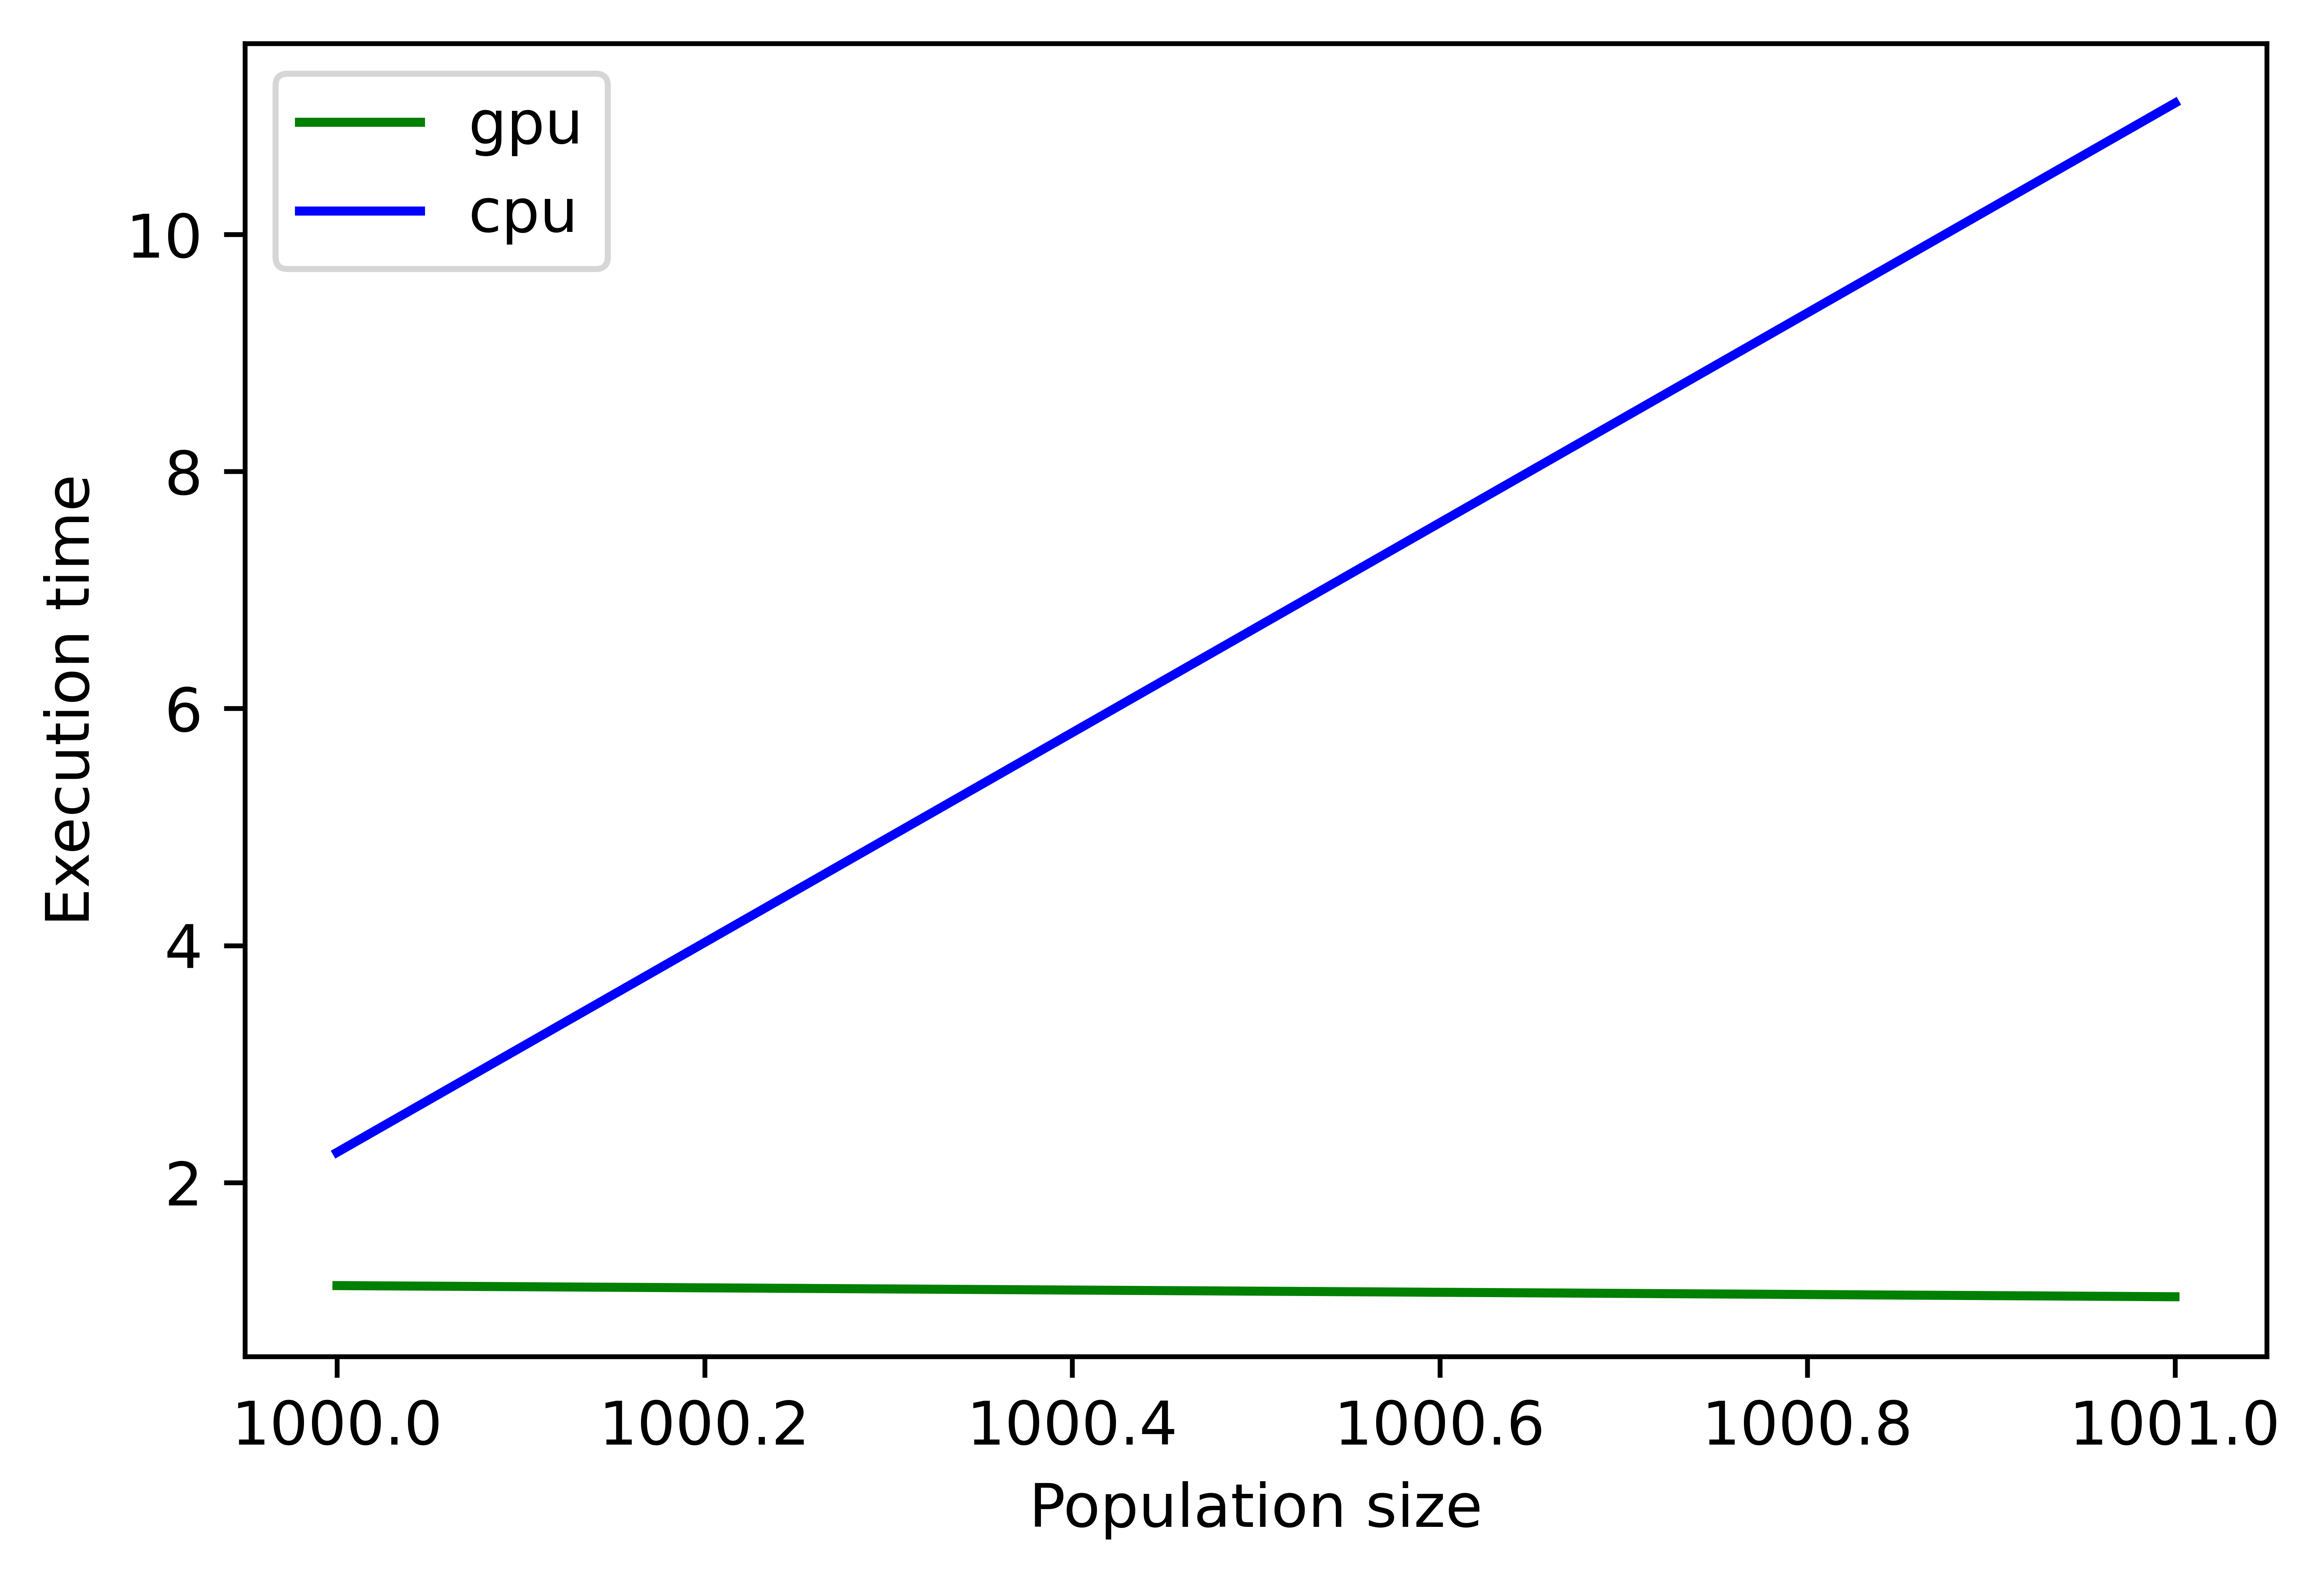

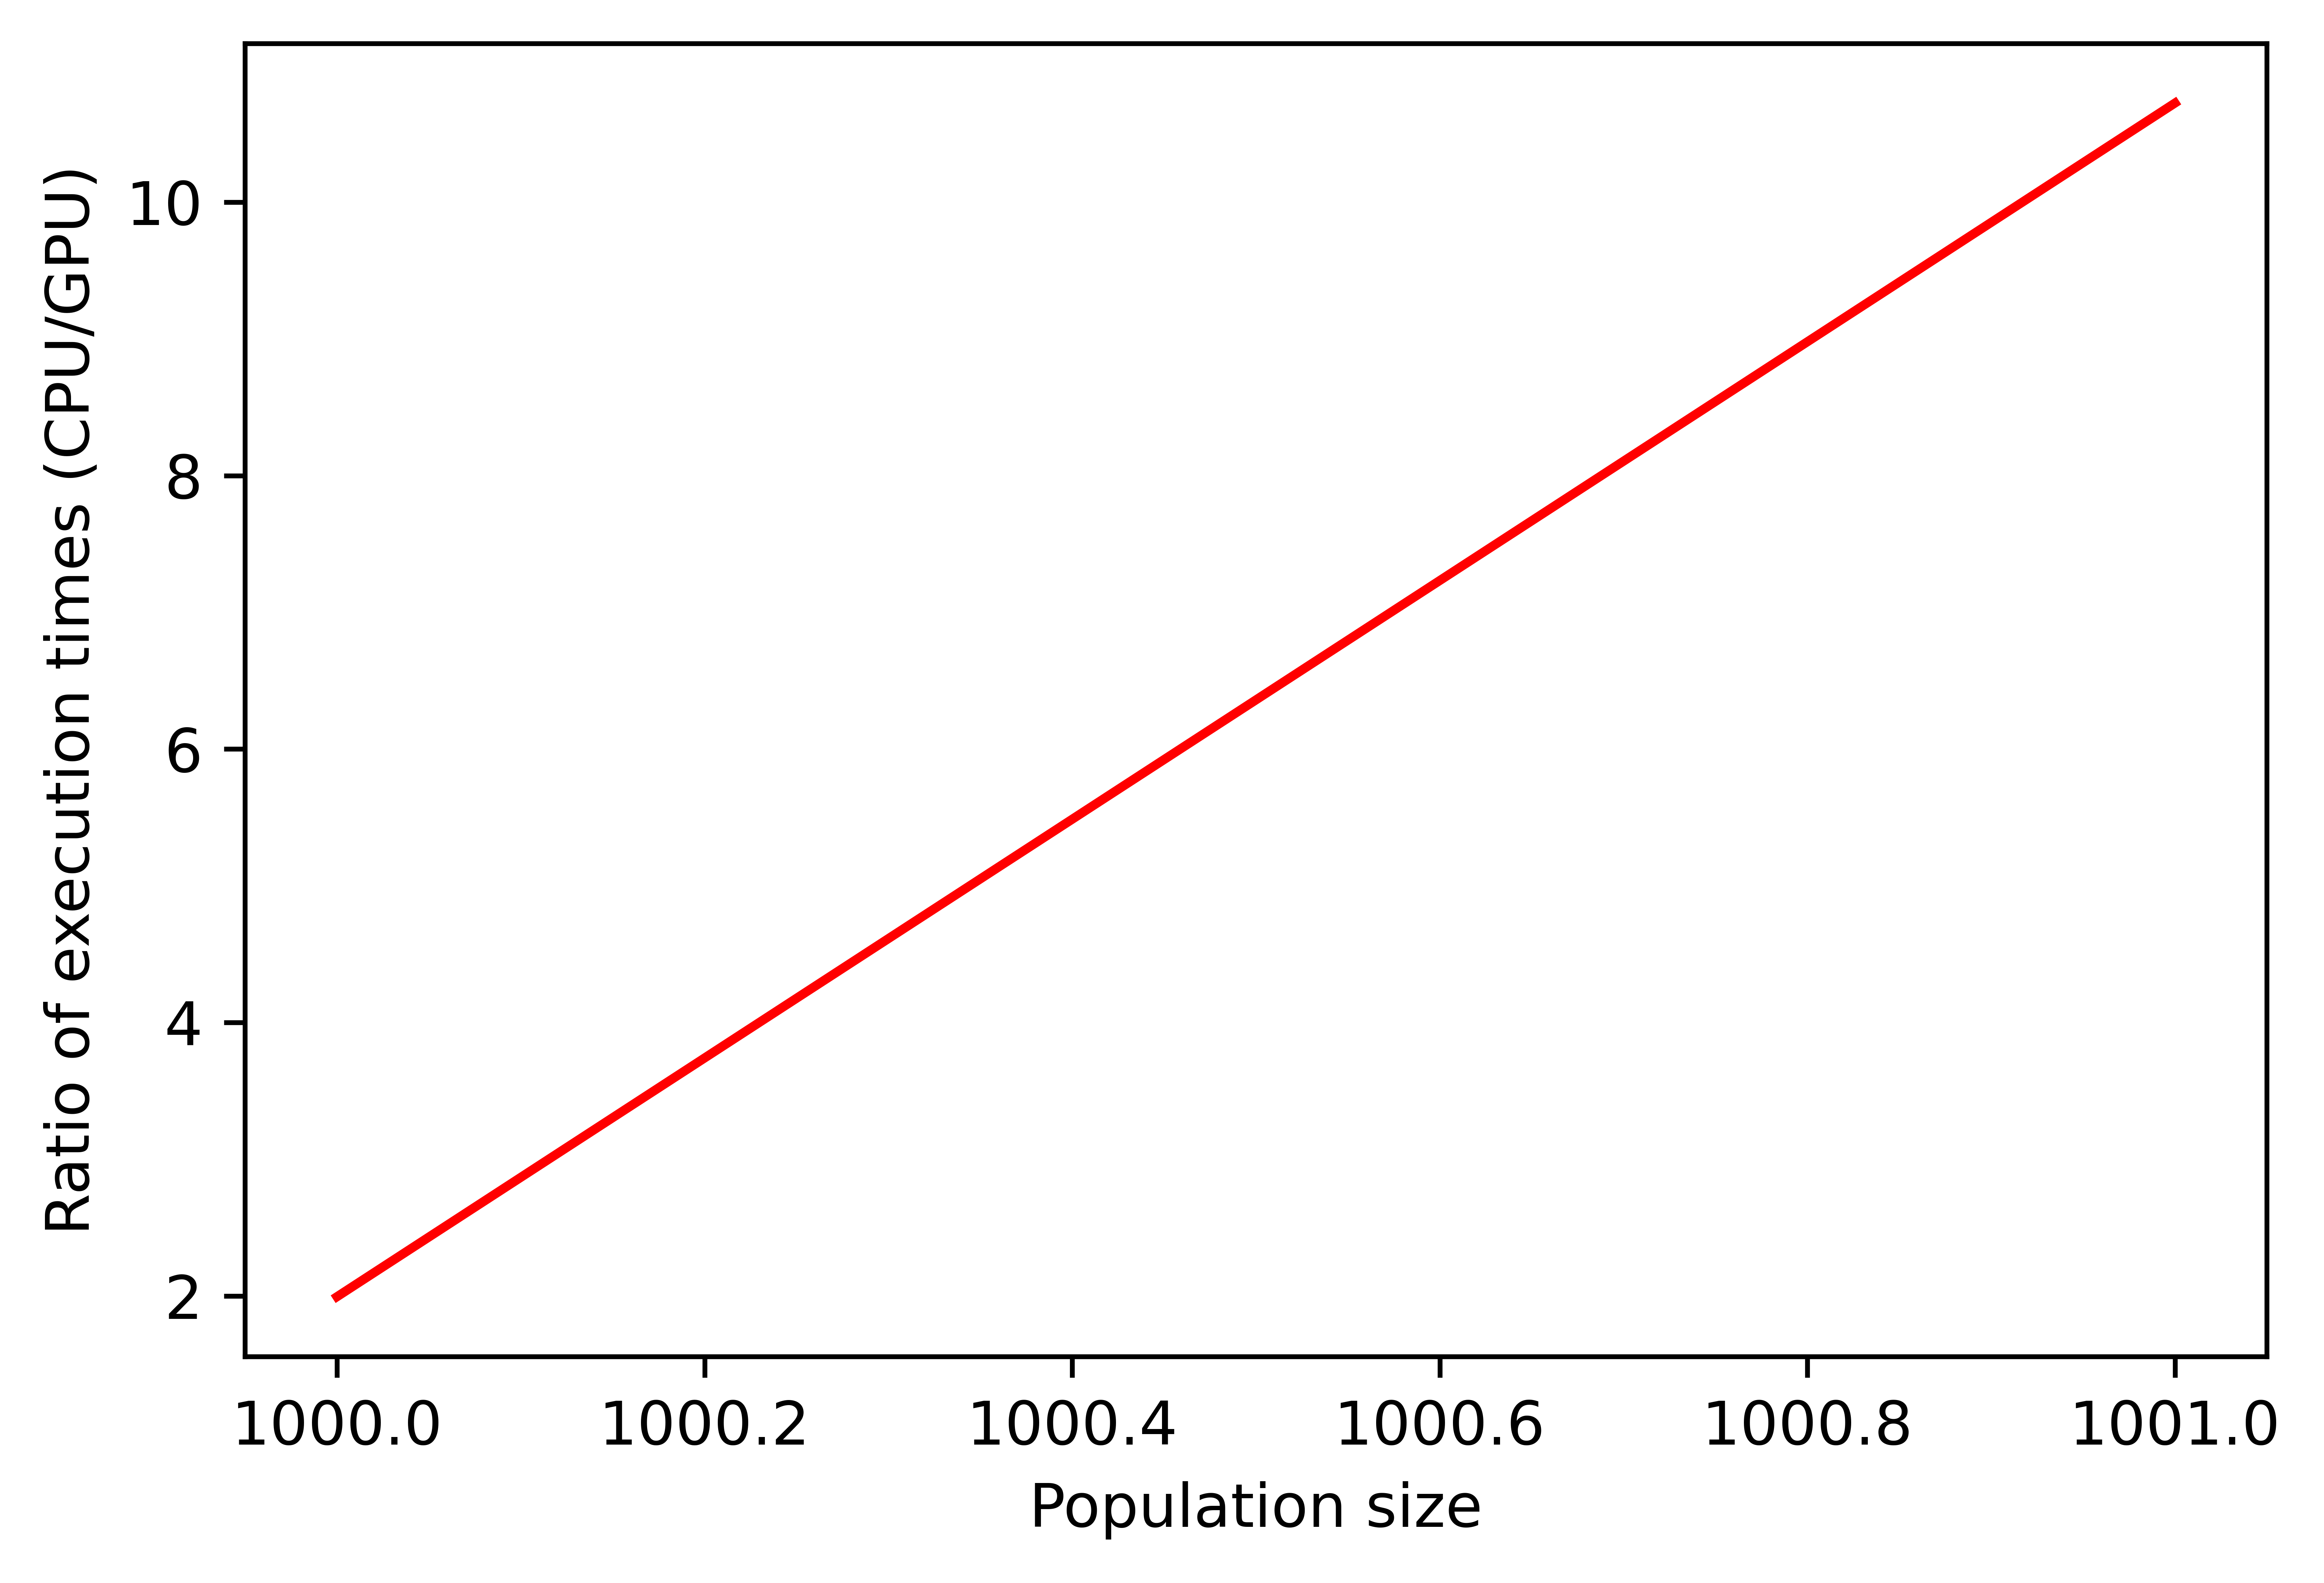

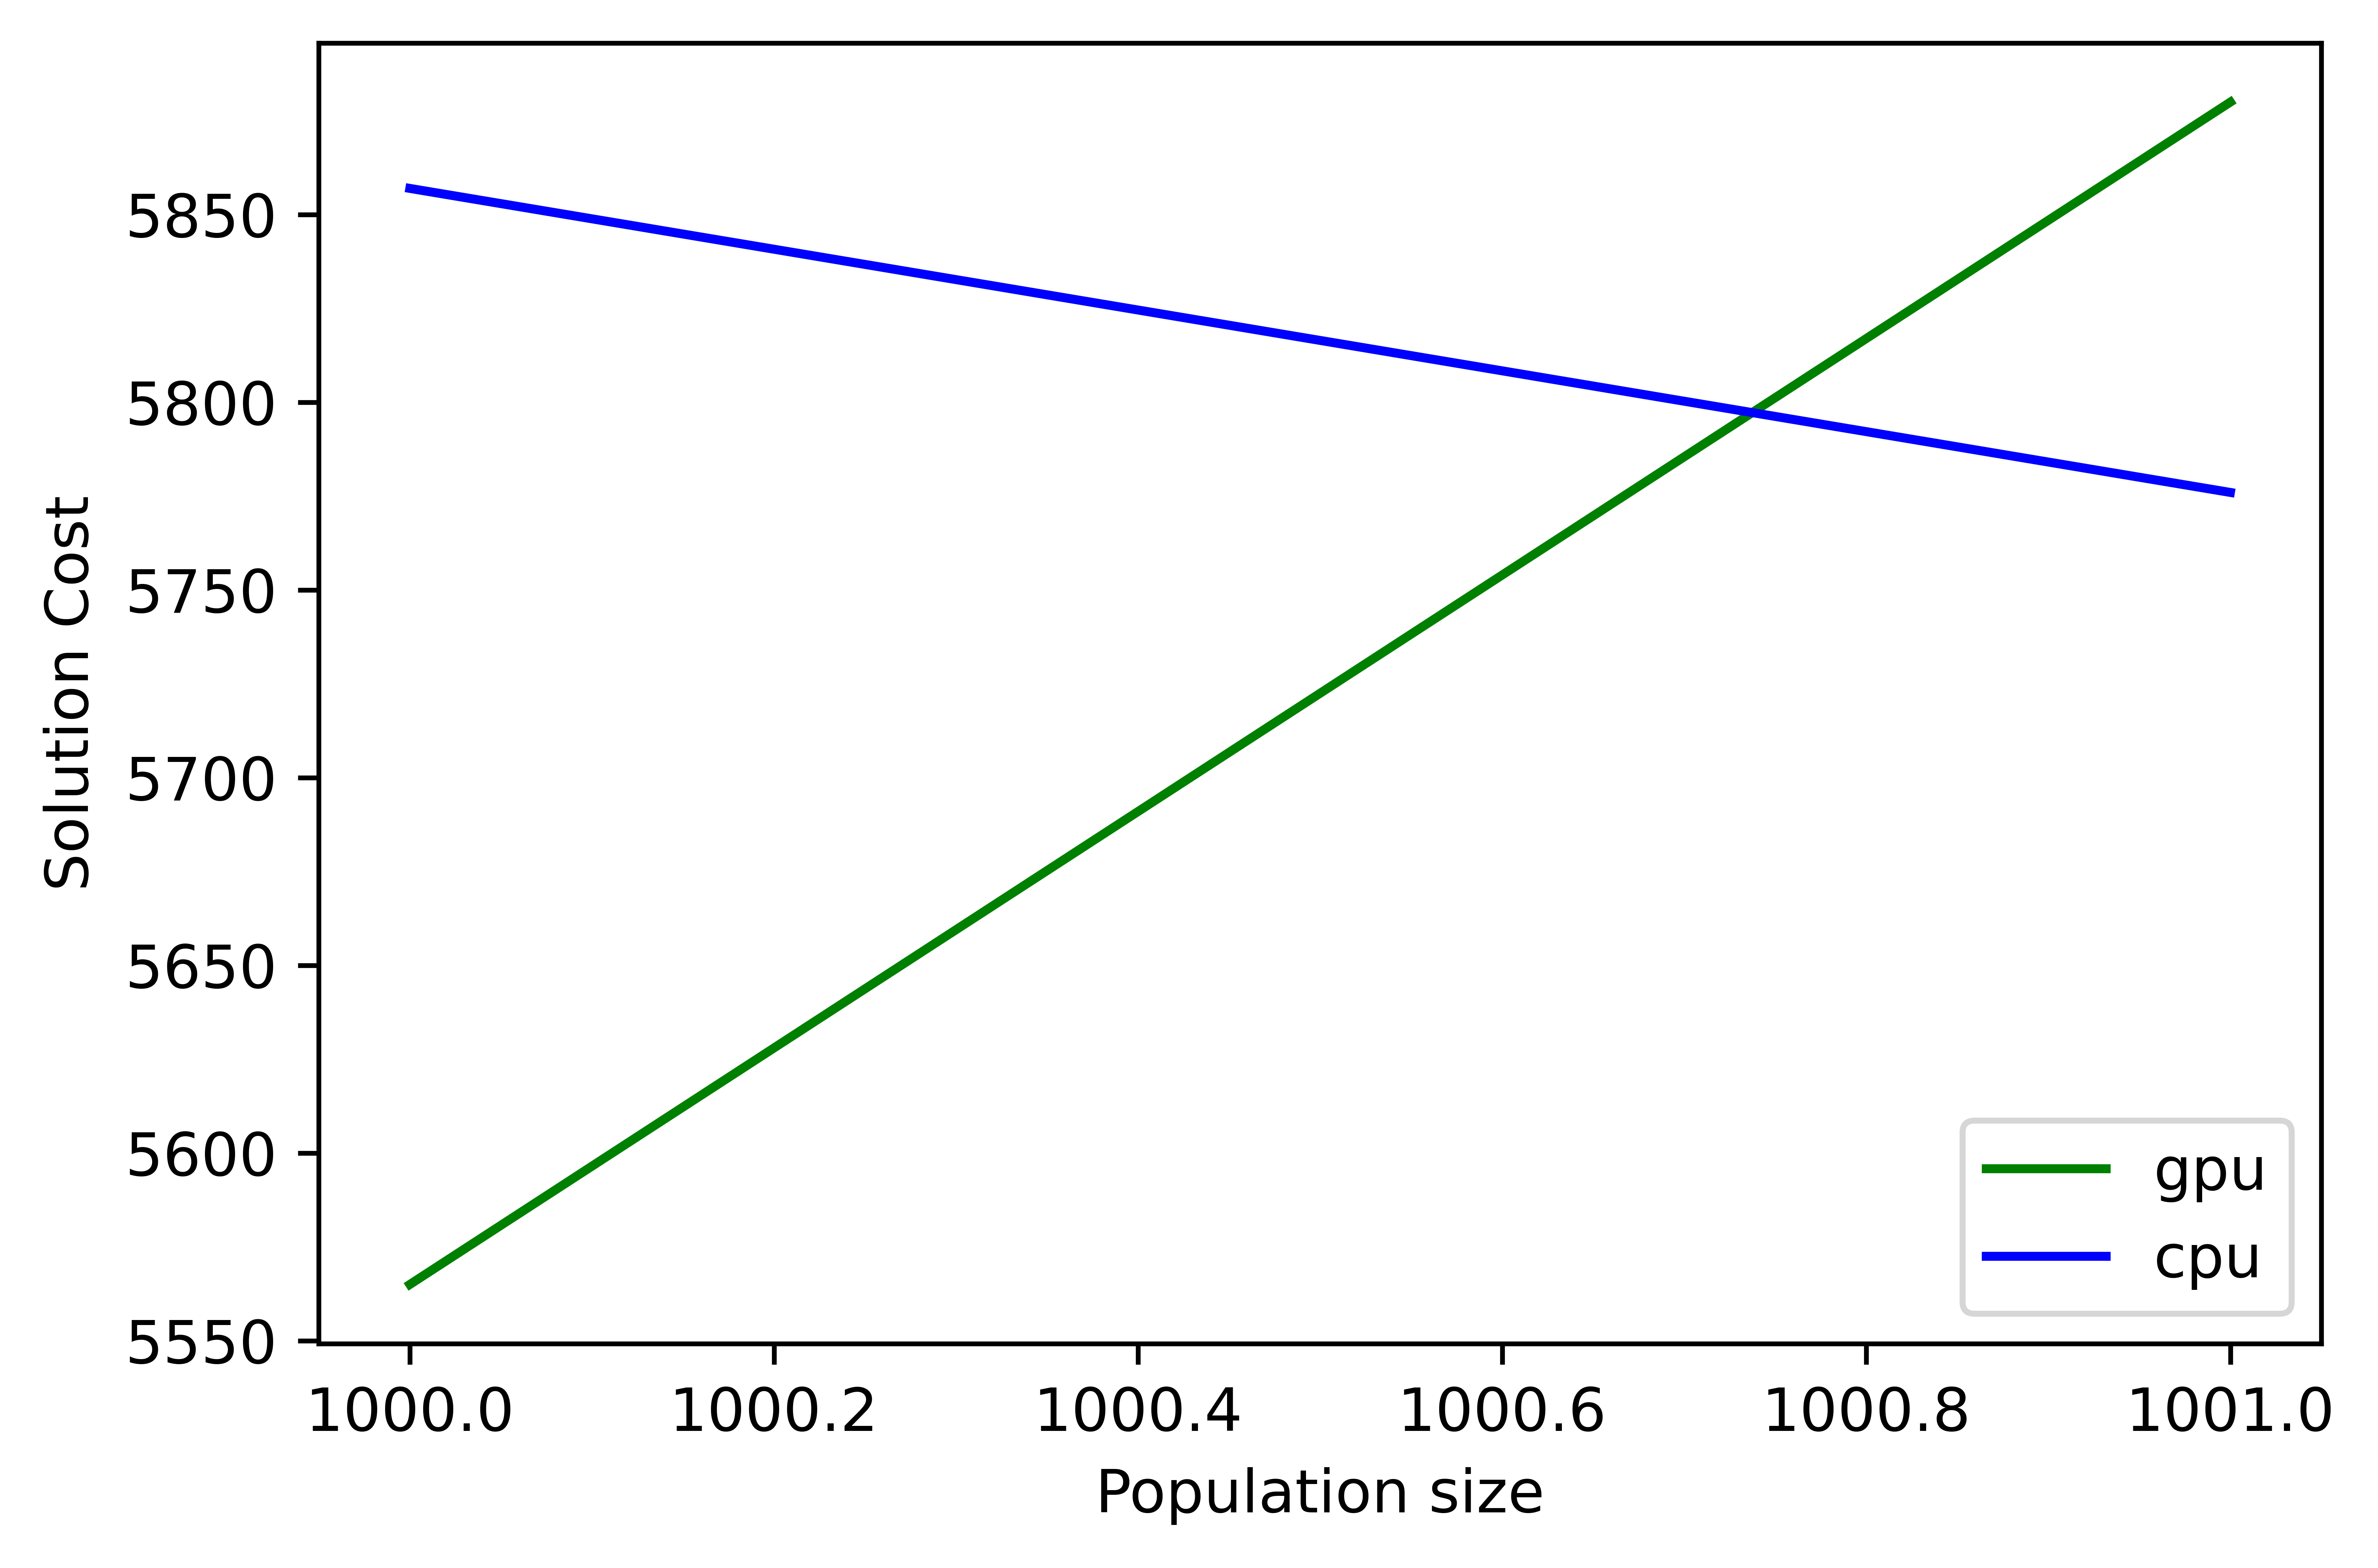

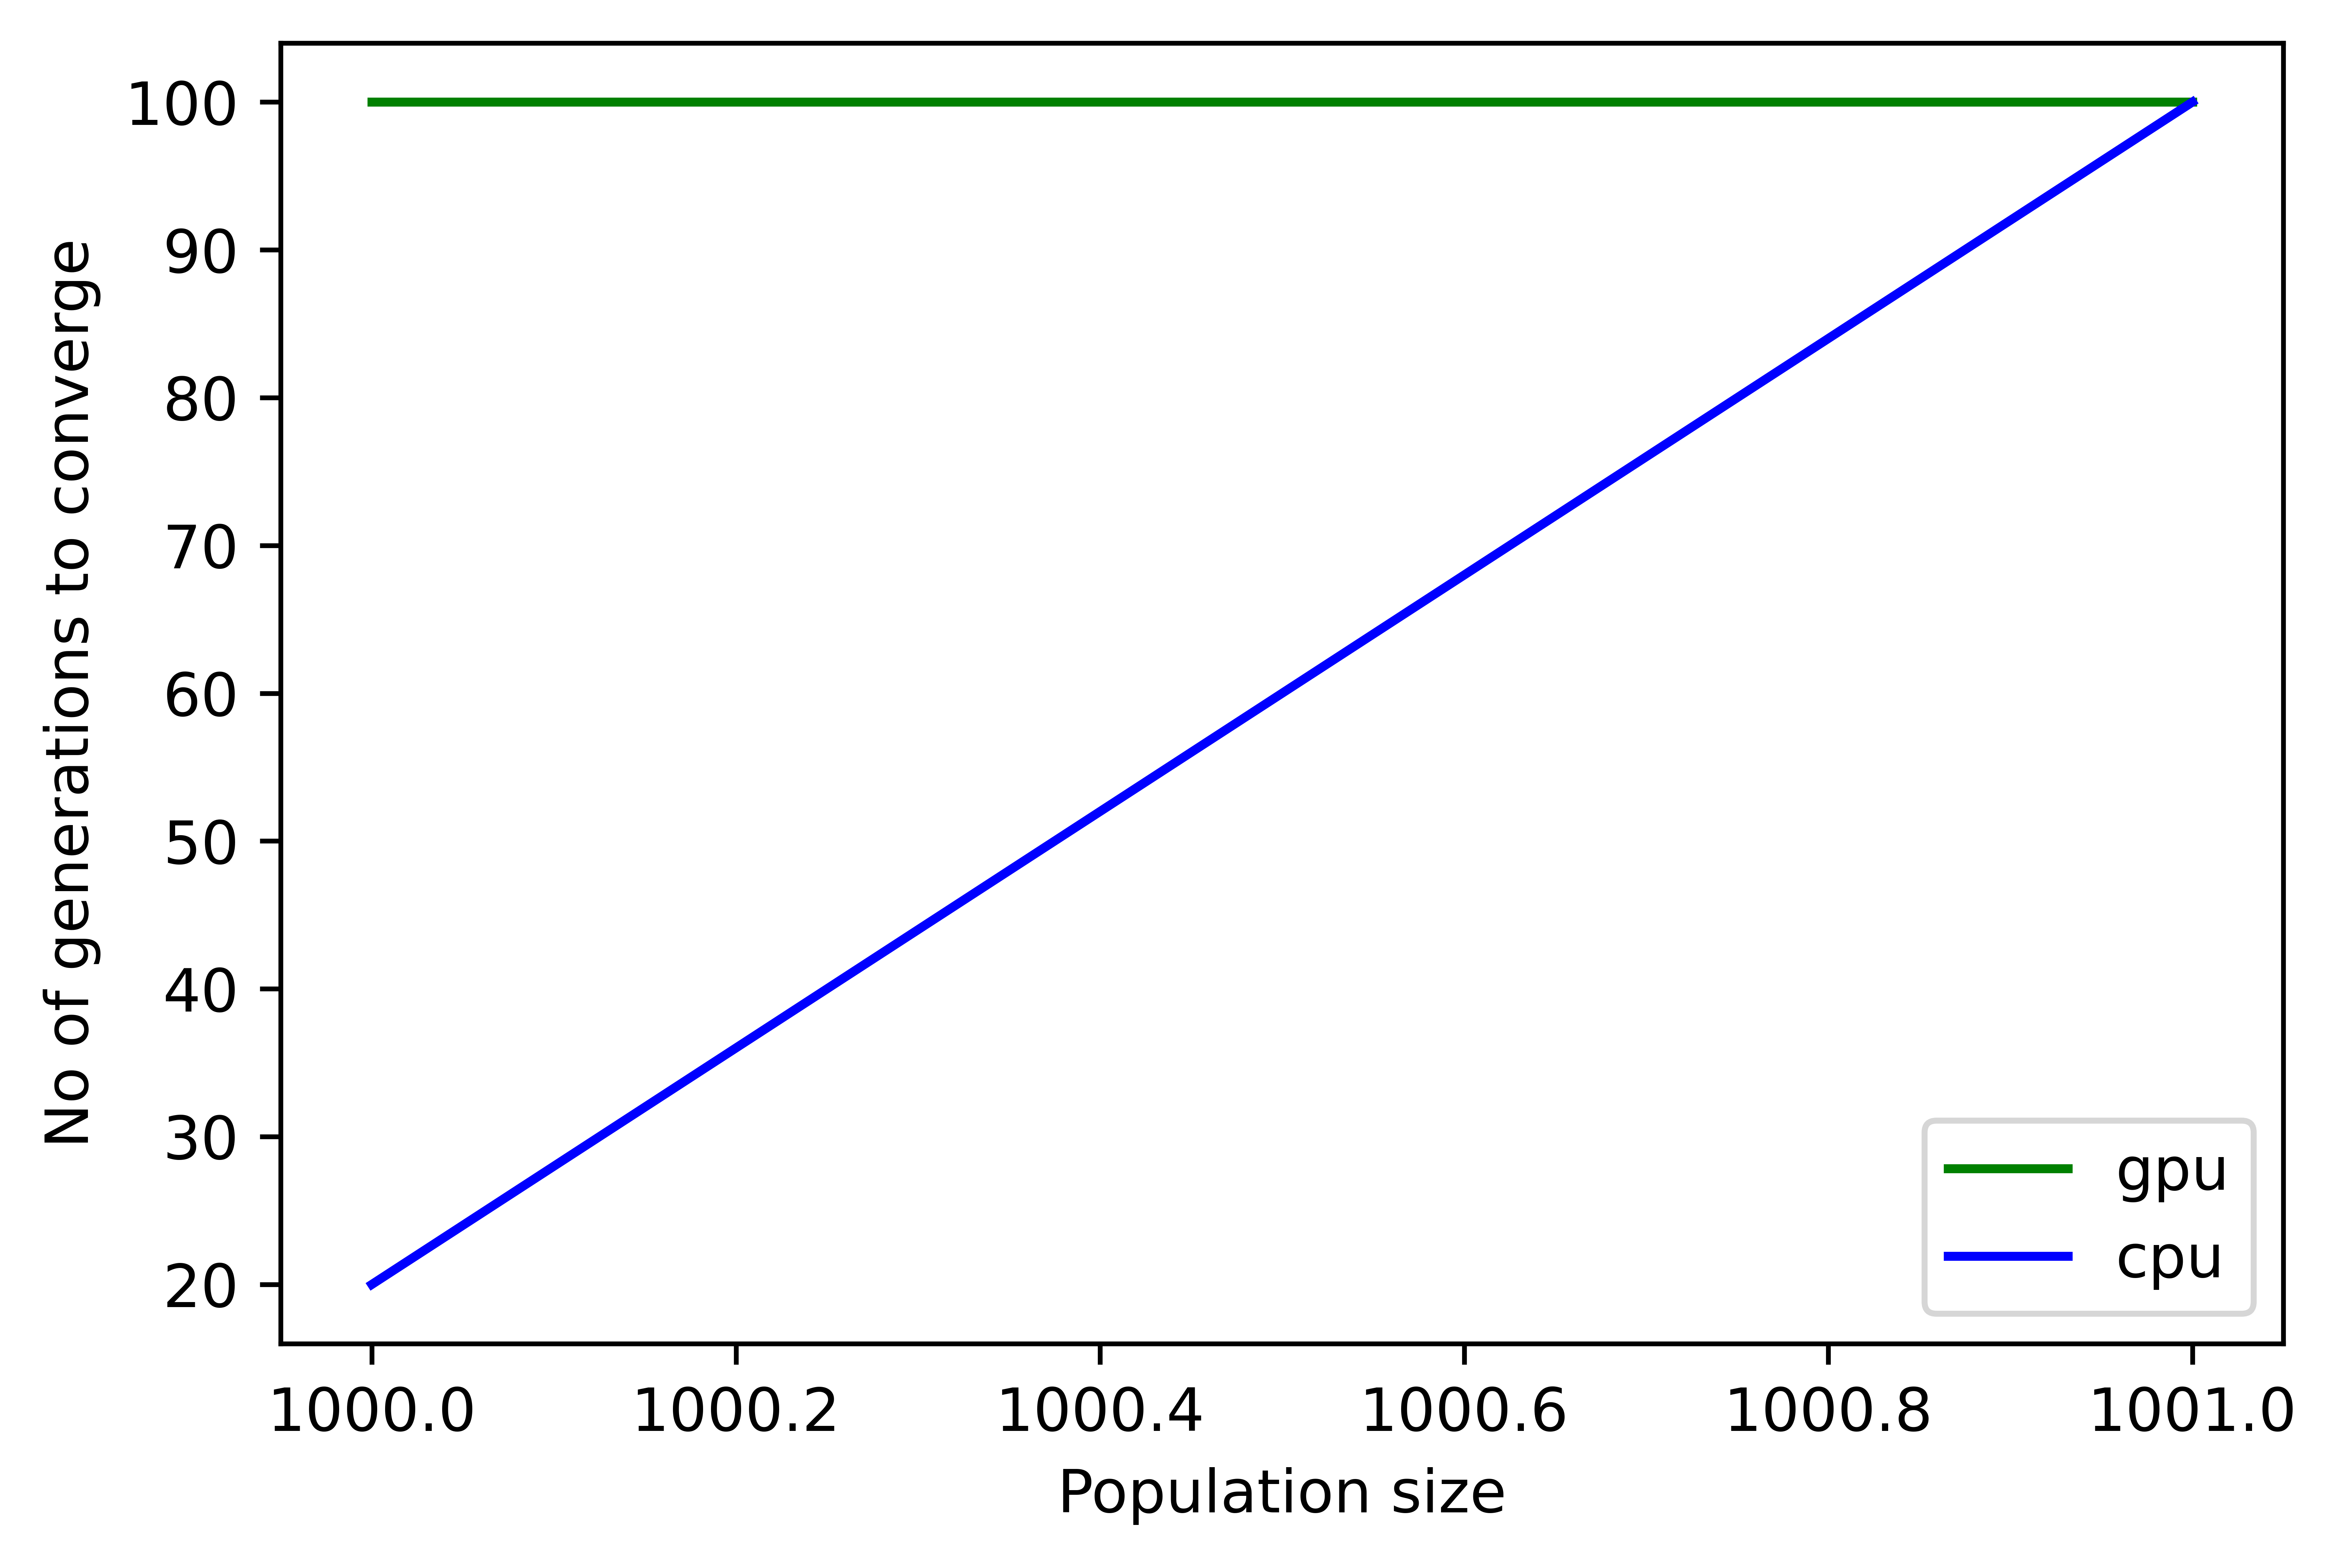

In [28]:
getPlots(filename = 'gr48', lower_pop = 1000, upper_pop = 1002, inc_pop = 1, NUM_GEN=100)